In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, ensemble

smoking = pd.read_csv('./smoking.csv')
smoking.head(10)

,gender,age,height(cm),weight(kg),bmi,waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,0,40,155,60,0.387097,81.3,1.2,1.0,1,1,...,126,12.9,1,0.7,18,19,27,0,1,0
1,0,40,160,60,0.375000,81.0,0.8,0.6,1,1,...,127,12.7,1,0.6,22,19,18,0,1,0
2,1,55,170,60,0.352941,80.0,0.8,0.8,1,1,...,151,15.8,1,1.0,21,16,22,0,0,1
3,1,40,165,70,0.424242,88.0,1.5,1.5,1,1,...,226,14.7,1,1.0,19,26,18,0,1,0
4,0,40,155,60,0.387097,86.0,1.0,1.0,1,1,...,107,12.5,1,0.6,16,14,22,0,0,0
5,1,30,180,75,0.416667,85.0,1.2,1.2,1,1,...,129,16.2,1,1.2,18,27,33,0,1,0
6,1,40,160,60,0.375000,85.5,1.0,1.0,1,1,...,157,17.0,1,0.7,21,27,39,1,1,1
7,1,45,165,90,0.545455,96.0,1.2,1.0,1,1,...,134,15.0,1,1.3,38,71,111,0,1,0
8,0,50,150,60,0.400000,85.0,0.7,0.8,1,1,...,149,13.7,1,0.8,31,31,14,0,0,0
9,1,45,175,75,0.428571,89.0,1.0,1.0,1,1,...,126,16.0,1,0.8,26,24,63,0,0,0


In [3]:
print(smoking.describe())
print(smoking.info())

             gender           age    height(cm)    weight(kg)           bmi  \
count  55692.000000  55692.000000  55692.000000  55692.000000  55692.000000   
mean       0.635657     44.182917    164.649321     65.864936      0.398335   
std        0.481250     12.071418      9.194597     12.820306      0.064434   
min        0.000000     20.000000    130.000000     30.000000      0.206897   
25%        0.000000     40.000000    160.000000     55.000000      0.352941   
50%        1.000000     40.000000    165.000000     65.000000      0.393939   
75%        1.000000     55.000000    170.000000     75.000000      0.441176   
max        1.000000     85.000000    190.000000    135.000000      0.750000   

          waist(cm)  eyesight(left)  eyesight(right)  hearing(left)  \
count  55692.000000    55692.000000     55692.000000   55692.000000   
mean      82.046418        1.012623         1.007443       1.025587   
std        9.274223        0.486873         0.485964       0.157902   
min 

In [1]:
smoking['age'].hist(bins=2)

NameError: name 'smoking' is not defined

<Axes: >

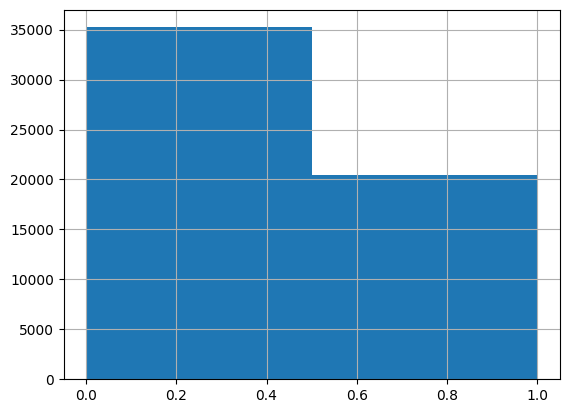

In [21]:
smoking['smoking'].hist(bins=2)

<Axes: >

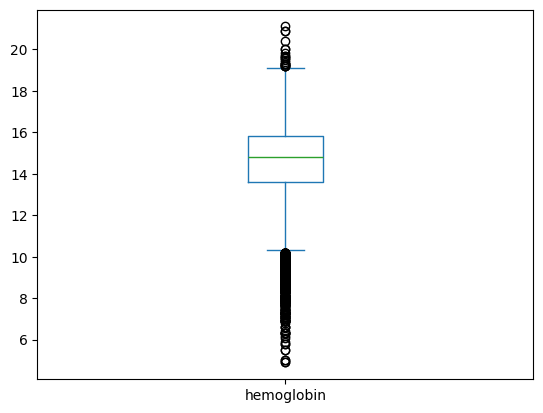

In [20]:
smoking['hemoglobin'].plot.box() 

<Axes: >

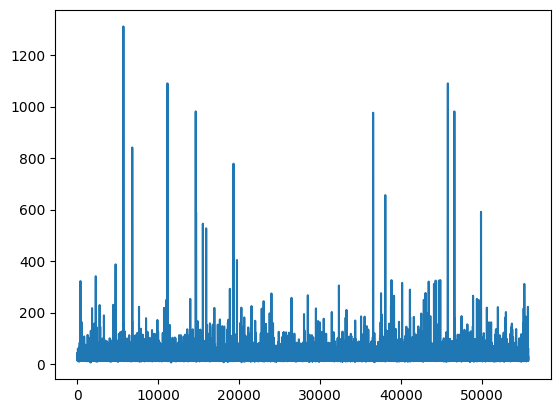

In [22]:
smoking['AST'].plot()

<Axes: ylabel='Density'>

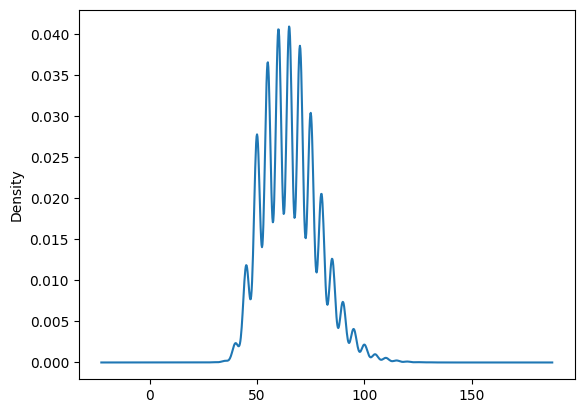

In [26]:
smoking['weight(kg)'].plot.kde()

<Axes: xlabel='AST', ylabel='ALT'>

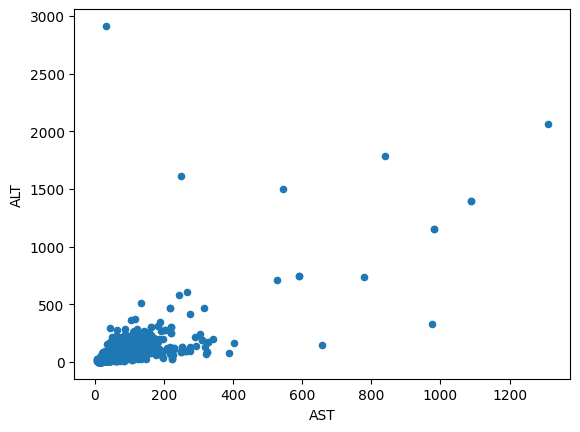

In [27]:
smoking.plot.scatter(x='AST', y='ALT')

array([[<Axes: xlabel='weight(kg)', ylabel='weight(kg)'>,
        <Axes: xlabel='hemoglobin', ylabel='weight(kg)'>,
        <Axes: xlabel='AST', ylabel='weight(kg)'>,
        <Axes: xlabel='ALT', ylabel='weight(kg)'>,
        <Axes: xlabel='Gtp', ylabel='weight(kg)'>],
       [<Axes: xlabel='weight(kg)', ylabel='hemoglobin'>,
        <Axes: xlabel='hemoglobin', ylabel='hemoglobin'>,
        <Axes: xlabel='AST', ylabel='hemoglobin'>,
        <Axes: xlabel='ALT', ylabel='hemoglobin'>,
        <Axes: xlabel='Gtp', ylabel='hemoglobin'>],
       [<Axes: xlabel='weight(kg)', ylabel='AST'>,
        <Axes: xlabel='hemoglobin', ylabel='AST'>,
        <Axes: xlabel='AST', ylabel='AST'>,
        <Axes: xlabel='ALT', ylabel='AST'>,
        <Axes: xlabel='Gtp', ylabel='AST'>],
       [<Axes: xlabel='weight(kg)', ylabel='ALT'>,
        <Axes: xlabel='hemoglobin', ylabel='ALT'>,
        <Axes: xlabel='AST', ylabel='ALT'>,
        <Axes: xlabel='ALT', ylabel='ALT'>,
        <Axes: xlabel='Gtp', ylabel

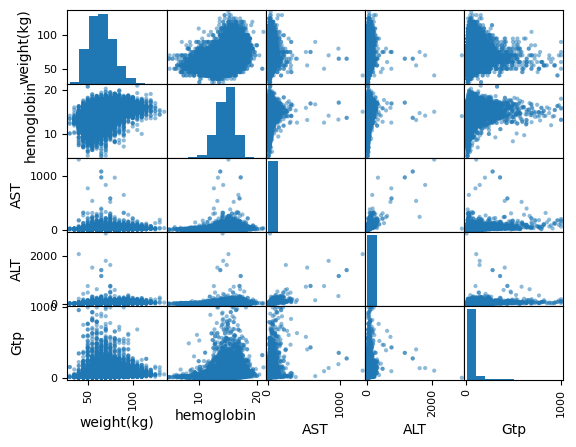

In [28]:
pd.plotting.scatter_matrix(smoking[['weight(kg)', 'hemoglobin', 'AST', 'ALT', 'Gtp']])

In [6]:
#Macierz korelacji
corr_matrix = smoking.corr() 
corr_matrix['smoking'].sort_values(ascending=False)

smoking                1.000000
gender                 0.510340
hemoglobin             0.400678
height(cm)             0.396675
weight(kg)             0.302780
triglyceride           0.251799
Gtp                    0.236619
bmi                    0.231693
waist(cm)              0.226259
serum creatinine       0.216812
relaxation             0.108309
dental caries          0.103857
fasting blood sugar    0.100279
tartar                 0.098655
ALT                    0.097338
systolic               0.073109
eyesight(right)        0.063017
eyesight(left)         0.061204
AST                    0.059253
Urine protein          0.014267
hearing(right)        -0.018855
hearing(left)         -0.023209
Cholesterol           -0.028548
LDL                   -0.045220
age                   -0.162557
HDL                   -0.178470
Name: smoking, dtype: float64

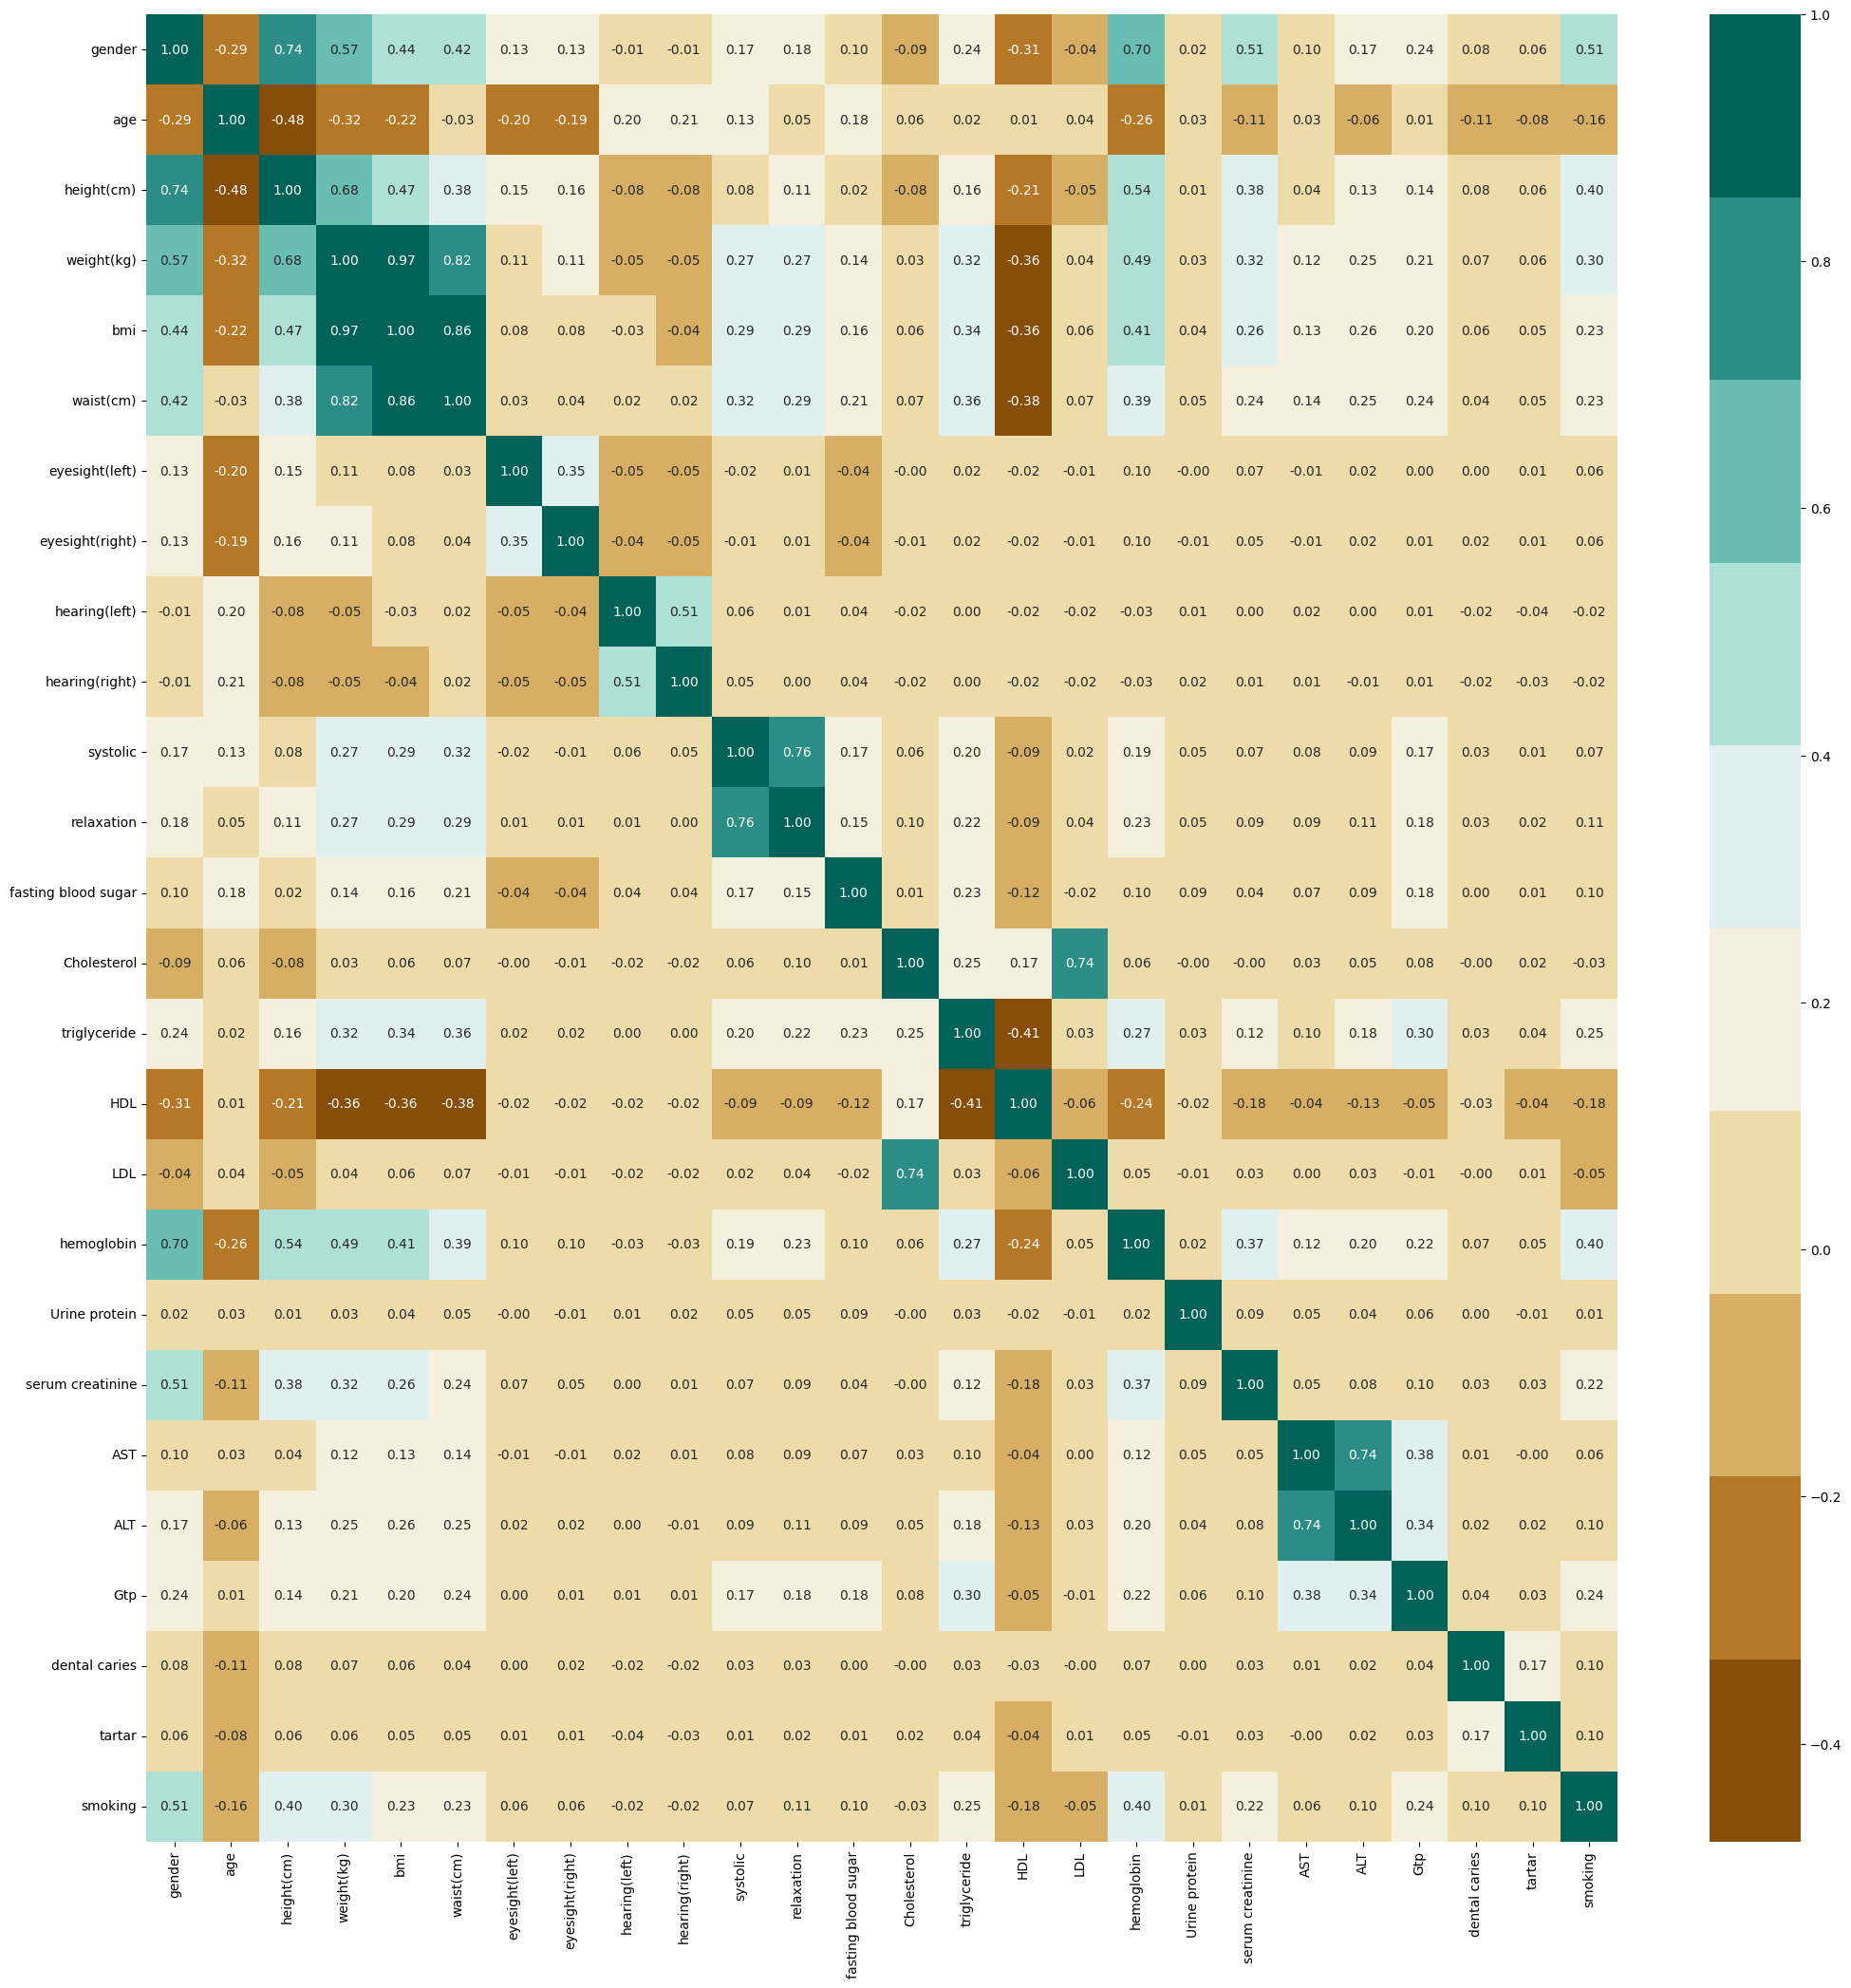

In [10]:
#Heat Map macierzy korelacji
correlations = smoking.corr()
fig, ax = plt.subplots(figsize=(25, 25))

colormap = sns.color_palette("BrBG", 10)

sns.heatmap(correlations, cmap=colormap, annot=True, fmt=".2f")
#ax.set_yticklabels(column_names);
plt.show()

In [2]:
X = smoking.drop('smoking', axis=1).to_numpy()
X

array([[  0.,  40., 155., ...,  27.,   0.,   1.],
       [  0.,  40., 160., ...,  18.,   0.,   1.],
       [  1.,  55., 170., ...,  22.,   0.,   0.],
       ...,
       [  0.,  55., 160., ...,  12.,   0.,   0.],
       [  1.,  60., 165., ...,  18.,   0.,   0.],
       [  1.,  55., 160., ...,  41.,   0.,   1.]])

In [3]:
y = smoking.loc[:, 'smoking'].to_numpy()
y

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345) 
X_train

array([[  1.,  45., 165., ...,  20.,   1.,   0.],
       [  1.,  40., 175., ...,  14.,   0.,   1.],
       [  0.,  50., 155., ...,  27.,   0.,   0.],
       ...,
       [  1.,  55., 160., ..., 238.,   0.,   0.],
       [  1.,  35., 170., ...,  20.,   0.,   0.],
       [  0.,  40., 155., ...,  17.,   0.,   1.]])

In [6]:
# universal method for training and evaluation of models

def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # train model
    classifier.fit(feature_vector_train, label)
    
    # generate labels for validation set
    predictions = classifier.predict(feature_vector_valid)
    
    # evealuate model based on test set labels
    scores = list(metrics.precision_recall_fscore_support(predictions, y_test))
    score_vals = [
        scores[0][0],
        scores[1][0],
        scores[2][0]
    ]
    score_vals.append(metrics.accuracy_score(predictions, y_test))
    return score_vals

In [13]:
accuracy = train_model(linear_model.LogisticRegression(), X_train, y_train, X_test)
accuracy_compare = {'LR': accuracy}
print ("LR: ", accuracy)

LR:  [0.8244962126625697, 0.7534282356014105, 0.7873618124744098, 0.720262142023521]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
# MODEL 2 - Support Vector Machine
accuracy = train_model(svm.SVC(), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM" , accuracy)

SVM [0.8459339717021581, 0.7593329057087876, 0.8002974580854516, 0.734805637848999]


In [17]:
# MODEL 3 - Random Forest Tree 
accuracy = train_model(ensemble.RandomForestClassifier(), X_train, y_train, X_test)
accuracy_compare['RF'] = accuracy
print ("RF: ", accuracy)

RF:  [0.8597970558810919, 0.8781199824843089, 0.8688619295205083, 0.8369692072897028]


In [18]:
# MODEL 4 - neural network
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
accuracy = train_model(mlp, X_train, y_train, X_test)
accuracy_compare['neural network'] = accuracy
print ("neural network" , accuracy)

neural network [0.7594683435758182, 0.8322631166797181, 0.7942011657450306, 0.7527605709668731]


<Axes: >

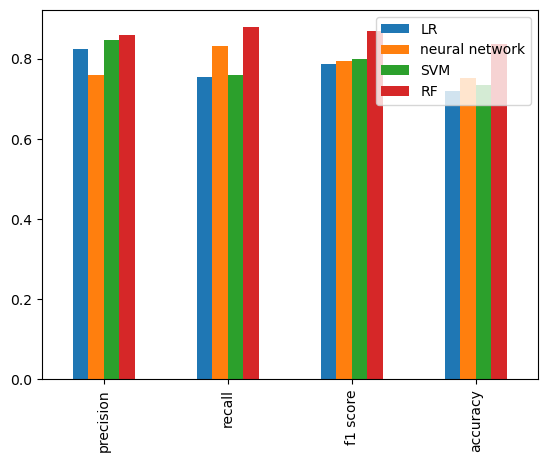

In [19]:
# compare models

df_compare = pd.DataFrame(accuracy_compare, index = ['precision', 'recall', 'f1 score', 'accuracy'])
df_compare.plot(kind='bar')